# Merging dataset

In [1]:
# Loading Library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
import numpy as np # linear algebra
import pandas as pd 
pd.options.mode.chained_assignment = None
import datetime as DT
import io
import requests
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from pandas import DataFrame

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

In [2]:
# Importing data set State_Code
#State_code = pd.read_csv("/content/drive/MyDrive/MDA-2022-Italy/Report/Dataset_preparation/State_Code.csv")
State_code = pd.read_csv("State_Code.csv")
State_code.head()

,Unnamed: 0,state_code,states
0,0,AL,Alabama
1,1,AK,Alaska
2,2,AZ,Arizona
3,3,AR,Arkansas
4,4,CA,California


In [ ]:
# Importing dataset Policy
Policy = pd.read_csv("/content/drive/MyDrive/MDA-2022-Italy/Report/Dataset_preparation/covid_policydata.csv")
Policy.head()

,Unnamed: 0,state_code,inmate_vaccination_quarter2020Q2,inmate_vaccination_quarter2020Q3,inmate_vaccination_quarter2020Q4,inmate_vaccination_quarter2021Q1,inmate_testing_quarter2020Q2,inmate_testing_quarter2020Q3,inmate_testing_quarter2020Q4,inmate_testing_quarter2021Q1,...,staff_testing_quarter2020Q4,staff_testing_quarter2021Q1,staff_masking_quarter2020Q2,staff_masking_quarter2020Q3,staff_masking_quarter2020Q4,staff_masking_quarter2021Q1,staff_quarantine_quarter2020Q2,staff_quarantine_quarter2020Q3,staff_quarantine_quarter2020Q4,staff_quarantine_quarter2021Q1
0,0,AK,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,AL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,3,AZ,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,4,CA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Adding the column states to the policy 
Policy.sort_values("state_code")
State_code.sort_values("state_code")
Policy1 = pd.merge(Policy, State_code, on='state_code')


In [ ]:
# Getting the column name of the Policy dataset to order them
for col in Policy1.columns:
    print(col)

Unnamed: 0_x
state_code
inmate_vaccination_quarter2020Q2
inmate_vaccination_quarter2020Q3
inmate_vaccination_quarter2020Q4
inmate_vaccination_quarter2021Q1
inmate_testing_quarter2020Q2
inmate_testing_quarter2020Q3
inmate_testing_quarter2020Q4
inmate_testing_quarter2021Q1
inmate_masking_quarter2020Q2
inmate_masking_quarter2020Q3
inmate_masking_quarter2020Q4
inmate_masking_quarter2021Q1
inmate_releases_quarter2020Q2
inmate_releases_quarter2020Q3
inmate_releases_quarter2020Q4
inmate_releases_quarter2021Q1
inmate_social_distance_quarter2020Q2
inmate_social_distance_quarter2020Q3
inmate_social_distance_quarter2020Q4
inmate_social_distance_quarter2021Q1
inmate_social_distance_sleep_quarter2020Q2
inmate_social_distance_sleep_quarter2020Q3
inmate_social_distance_sleep_quarter2020Q4
inmate_social_distance_sleep_quarter2021Q1
inmate_screening_quarter2020Q2
inmate_screening_quarter2020Q3
inmate_screening_quarter2020Q4
inmate_screening_quarter2021Q1
inmate_quarantine_quarter2020Q2
inmate_quarantin

In [ ]:
# Removing useless variable and changing the order
Policy1=Policy1[["state_code","states","inmate_vaccination_quarter2020Q2","inmate_vaccination_quarter2020Q3","inmate_vaccination_quarter2020Q4","inmate_vaccination_quarter2021Q1","inmate_testing_quarter2020Q2","inmate_testing_quarter2020Q3","inmate_testing_quarter2020Q4","inmate_testing_quarter2021Q1","inmate_masking_quarter2020Q2","inmate_masking_quarter2020Q3","inmate_masking_quarter2020Q4","inmate_masking_quarter2021Q1","inmate_releases_quarter2020Q2","inmate_releases_quarter2020Q3","inmate_releases_quarter2020Q4","inmate_releases_quarter2021Q1","inmate_social_distance_quarter2020Q2","inmate_social_distance_quarter2020Q3","inmate_social_distance_quarter2020Q4","inmate_social_distance_quarter2021Q1","inmate_social_distance_sleep_quarter2020Q2","inmate_social_distance_sleep_quarter2020Q3","inmate_social_distance_sleep_quarter2020Q4","inmate_social_distance_sleep_quarter2021Q1","inmate_screening_quarter2020Q2","inmate_screening_quarter2020Q3","inmate_screening_quarter2020Q4","inmate_screening_quarter2021Q1","inmate_quarantine_quarter2020Q2","inmate_quarantine_quarter2020Q3","inmate_quarantine_quarter2020Q4","inmate_quarantine_quarter2021Q1","inmate_visitation_suspended_quarter2020Q2","inmate_visitation_suspended_quarter2020Q3","inmate_visitation_suspended_quarter2020Q4","inmate_visitation_suspended_quarter2021Q1","staff_testing_quarter2020Q2","staff_testing_quarter2020Q3","staff_testing_quarter2020Q4","staff_testing_quarter2021Q1","staff_masking_quarter2020Q2","staff_masking_quarter2020Q3","staff_masking_quarter2020Q4","staff_masking_quarter2021Q1","staff_quarantine_quarter2020Q2","staff_quarantine_quarter2020Q3","staff_quarantine_quarter2020Q4","staff_quarantine_quarter2021Q1"]]
Policy1.sort_values("states")
Policy1.head()

,state_code,states,inmate_vaccination_quarter2020Q2,inmate_vaccination_quarter2020Q3,inmate_vaccination_quarter2020Q4,inmate_vaccination_quarter2021Q1,inmate_testing_quarter2020Q2,inmate_testing_quarter2020Q3,inmate_testing_quarter2020Q4,inmate_testing_quarter2021Q1,...,staff_testing_quarter2020Q4,staff_testing_quarter2021Q1,staff_masking_quarter2020Q2,staff_masking_quarter2020Q3,staff_masking_quarter2020Q4,staff_masking_quarter2021Q1,staff_quarantine_quarter2020Q2,staff_quarantine_quarter2020Q3,staff_quarantine_quarter2020Q4,staff_quarantine_quarter2021Q1
0,AK,Alaska,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,AL,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,AR,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,AZ,Arizona,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,CA,California,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Importing cases and death data set by states
Covid = pd.read_csv("/content/drive/MyDrive/MDA-2022-Italy/Report/Dataset_preparation/dataQuarterly.csv")
Covid.sort_values("States")
Covid.head()

,States,2020Q2Residents.Confirmed,2020Q3Residents.Confirmed,2020Q4Residents.Confirmed,2021Q1Residents.Confirmed,2020Q2Residents.Deaths,2020Q3Residents.Deaths,2020Q4Residents.Deaths,2021Q1Residents.Deaths
0,Alabama,100.0,327.0,723.0,447.0,10.0,13.0,28.0,10.0
1,Alaska,5.0,60.0,1944.0,239.0,0.0,0.0,5.0,0.0
2,Arizona,529.0,2057.0,4552.0,4384.0,13.0,15.0,8.0,9.0
3,Arkansas,2981.0,3441.0,3973.0,488.0,14.0,28.0,5.0,1.0
4,California,5853.0,8730.0,25475.0,6175.0,31.0,37.0,60.0,68.0


In [ ]:
# Importing prison dataset
Prison = pd.read_csv("/content/drive/MyDrive/MDA-2022-Italy/Report/Dataset_preparation/Prison.csv")
Prison.sort_values("States")
Prison = Prison[["States","avg capacity","Perc_Budget"]]
Prison.head()

,States,avg capacity,Perc_Budget
0,Alabama,112.60,1.844385
1,Alaska,91.65,3.265038
2,Arizona,90.40,2.317528
3,Arkansas,88.15,1.227676
4,California,90.55,2.414770


## Merging the three dataset together

In [ ]:
# Merging Covid dataset with Prison dataset by states
Dataset_a = pd.merge(Covid,Prison,on="States")
Dataset_a.rename(columns = {'States':'states'}, inplace = True)
Dataset_a.head()

,states,2020Q2Residents.Confirmed,2020Q3Residents.Confirmed,2020Q4Residents.Confirmed,2021Q1Residents.Confirmed,2020Q2Residents.Deaths,2020Q3Residents.Deaths,2020Q4Residents.Deaths,2021Q1Residents.Deaths,avg capacity,Perc_Budget
0,Alabama,100.0,327.0,723.0,447.0,10.0,13.0,28.0,10.0,112.60,1.844385
1,Alaska,5.0,60.0,1944.0,239.0,0.0,0.0,5.0,0.0,91.65,3.265038
2,Arizona,529.0,2057.0,4552.0,4384.0,13.0,15.0,8.0,9.0,90.40,2.317528
3,Arkansas,2981.0,3441.0,3973.0,488.0,14.0,28.0,5.0,1.0,88.15,1.227676
4,California,5853.0,8730.0,25475.0,6175.0,31.0,37.0,60.0,68.0,90.55,2.414770


In [ ]:
# Adding the Policy data to Dataset_a to get the final Dataset
Dataset = pd.merge(Dataset_a,Policy1,on="states")
Dataset.head()

,states,2020Q2Residents.Confirmed,2020Q3Residents.Confirmed,2020Q4Residents.Confirmed,2021Q1Residents.Confirmed,2020Q2Residents.Deaths,2020Q3Residents.Deaths,2020Q4Residents.Deaths,2021Q1Residents.Deaths,avg capacity,...,staff_testing_quarter2020Q4,staff_testing_quarter2021Q1,staff_masking_quarter2020Q2,staff_masking_quarter2020Q3,staff_masking_quarter2020Q4,staff_masking_quarter2021Q1,staff_quarantine_quarter2020Q2,staff_quarantine_quarter2020Q3,staff_quarantine_quarter2020Q4,staff_quarantine_quarter2021Q1
0,Alabama,100.0,327.0,723.0,447.0,10.0,13.0,28.0,10.0,112.60,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Alaska,5.0,60.0,1944.0,239.0,0.0,0.0,5.0,0.0,91.65,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Arizona,529.0,2057.0,4552.0,4384.0,13.0,15.0,8.0,9.0,90.40,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Arkansas,2981.0,3441.0,3973.0,488.0,14.0,28.0,5.0,1.0,88.15,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,California,5853.0,8730.0,25475.0,6175.0,31.0,37.0,60.0,68.0,90.55,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
Dataset = Dataset[["state_code","states","2020Q2Residents.Confirmed","2020Q3Residents.Confirmed","2020Q4Residents.Confirmed","2021Q1Residents.Confirmed","2020Q2Residents.Deaths","2020Q3Residents.Deaths","2020Q4Residents.Deaths","2021Q1Residents.Deaths","avg capacity","Perc_Budget","inmate_vaccination_quarter2020Q2","inmate_vaccination_quarter2020Q3","inmate_vaccination_quarter2020Q4","inmate_vaccination_quarter2021Q1","inmate_testing_quarter2020Q2","inmate_testing_quarter2020Q3","inmate_testing_quarter2020Q4","inmate_testing_quarter2021Q1","inmate_masking_quarter2020Q2","inmate_masking_quarter2020Q3","inmate_masking_quarter2020Q4","inmate_masking_quarter2021Q1","inmate_releases_quarter2020Q2","inmate_releases_quarter2020Q3","inmate_releases_quarter2020Q4","inmate_releases_quarter2021Q1","inmate_social_distance_quarter2020Q2","inmate_social_distance_quarter2020Q3","inmate_social_distance_quarter2020Q4","inmate_social_distance_quarter2021Q1","inmate_social_distance_sleep_quarter2020Q2","inmate_social_distance_sleep_quarter2020Q3","inmate_social_distance_sleep_quarter2020Q4","inmate_social_distance_sleep_quarter2021Q1","inmate_screening_quarter2020Q2","inmate_screening_quarter2020Q3","inmate_screening_quarter2020Q4","inmate_screening_quarter2021Q1","inmate_quarantine_quarter2020Q2","inmate_quarantine_quarter2020Q3","inmate_quarantine_quarter2020Q4","inmate_quarantine_quarter2021Q1","inmate_visitation_suspended_quarter2020Q2","inmate_visitation_suspended_quarter2020Q3","inmate_visitation_suspended_quarter2020Q4","inmate_visitation_suspended_quarter2021Q1","staff_testing_quarter2020Q2","staff_testing_quarter2020Q3","staff_testing_quarter2020Q4","staff_testing_quarter2021Q1","staff_masking_quarter2020Q2","staff_masking_quarter2020Q3","staff_masking_quarter2020Q4","staff_masking_quarter2021Q1","staff_quarantine_quarter2020Q2","staff_quarantine_quarter2020Q3","staff_quarantine_quarter2020Q4","staff_quarantine_quarter2021Q1"]]
Dataset.head()

,state_code,states,2020Q2Residents.Confirmed,2020Q3Residents.Confirmed,2020Q4Residents.Confirmed,2021Q1Residents.Confirmed,2020Q2Residents.Deaths,2020Q3Residents.Deaths,2020Q4Residents.Deaths,2021Q1Residents.Deaths,...,staff_testing_quarter2020Q4,staff_testing_quarter2021Q1,staff_masking_quarter2020Q2,staff_masking_quarter2020Q3,staff_masking_quarter2020Q4,staff_masking_quarter2021Q1,staff_quarantine_quarter2020Q2,staff_quarantine_quarter2020Q3,staff_quarantine_quarter2020Q4,staff_quarantine_quarter2021Q1
0,AL,Alabama,100.0,327.0,723.0,447.0,10.0,13.0,28.0,10.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,AK,Alaska,5.0,60.0,1944.0,239.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,AZ,Arizona,529.0,2057.0,4552.0,4384.0,13.0,15.0,8.0,9.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,AR,Arkansas,2981.0,3441.0,3973.0,488.0,14.0,28.0,5.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,CA,California,5853.0,8730.0,25475.0,6175.0,31.0,37.0,60.0,68.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Summary of the Dataset

In [ ]:
# Summary of the Dataset
Dataset.describe()

,2020Q2Residents.Confirmed,2020Q3Residents.Confirmed,2020Q4Residents.Confirmed,2021Q1Residents.Confirmed,2020Q2Residents.Deaths,2020Q3Residents.Deaths,2020Q4Residents.Deaths,2021Q1Residents.Deaths,avg capacity,Perc_Budget,...,staff_testing_quarter2020Q4,staff_testing_quarter2021Q1,staff_masking_quarter2020Q2,staff_masking_quarter2020Q3,staff_masking_quarter2020Q4,staff_masking_quarter2021Q1,staff_quarantine_quarter2020Q2,staff_quarantine_quarter2020Q3,staff_quarantine_quarter2020Q4,staff_quarantine_quarter2021Q1
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,983.220000,1484.000000,3052.520000,988.220000,11.280000,10.200000,14.700000,8.640000,79.247000,1.966787,...,0.280000,0.220000,0.540000,0.760000,0.760000,0.560000,0.30000,0.340000,0.340000,0.240000
std,1802.556849,2860.832518,4230.184684,1297.800451,22.288498,20.906985,15.942819,13.278431,21.470142,0.546346,...,0.453557,0.418452,0.503457,0.431419,0.431419,0.501427,0.46291,0.478518,0.478518,0.431419
min,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.947164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,23.500000,165.250000,806.500000,239.750000,0.000000,0.000000,4.000000,1.250000,70.825000,1.589196,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,286.000000,349.000000,1859.000000,492.000000,3.000000,1.000000,7.500000,5.000000,81.175000,1.925160,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,702.500000,1686.250000,3498.750000,1044.500000,11.000000,11.000000,21.000000,8.750000,90.150000,2.332361,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,9545.000000,13808.000000,25475.000000,6175.000000,119.000000,107.000000,60.000000,68.000000,133.650000,3.265038,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


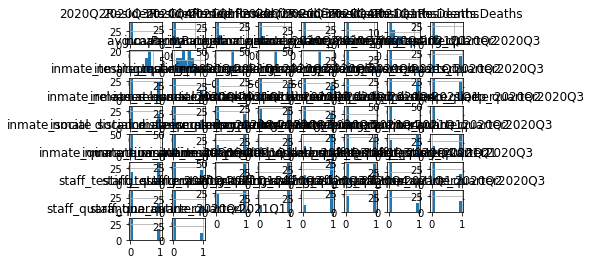

In [ ]:
Dataset.hist()
pyplot.show()

In [ ]:
# Saving the Dataset 
from google.colab import files
Dataset.to_csv('Dataset.csv', encoding = 'utf-8-sig') 
files.download('Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Normalization

In [ ]:
Data_Norm = Dataset.copy(deep=True)
Norm = MinMaxScaler()
Data_Norm[['2020Q2Residents.Confirmed','2020Q2Residents.Confirmed','2020Q3Residents.Confirmed','2020Q4Residents.Confirmed','2021Q1Residents.Confirmed','2020Q2Residents.Deaths','2020Q3Residents.Deaths','2020Q4Residents.Deaths','2021Q1Residents.Deaths']] = Norm.fit_transform(Data_Norm[['2020Q2Residents.Confirmed','2020Q2Residents.Confirmed','2020Q3Residents.Confirmed','2020Q4Residents.Confirmed','2021Q1Residents.Confirmed','2020Q2Residents.Deaths','2020Q3Residents.Deaths','2020Q4Residents.Deaths','2021Q1Residents.Deaths']])
Data_Norm = Data_Norm.round(3)
Data_Norm

,state_code,states,2020Q2Residents.Confirmed,2020Q3Residents.Confirmed,2020Q4Residents.Confirmed,2021Q1Residents.Confirmed,2020Q2Residents.Deaths,2020Q3Residents.Deaths,2020Q4Residents.Deaths,2021Q1Residents.Deaths,...,staff_testing_quarter2020Q4,staff_testing_quarter2021Q1,staff_masking_quarter2020Q2,staff_masking_quarter2020Q3,staff_masking_quarter2020Q4,staff_masking_quarter2021Q1,staff_quarantine_quarter2020Q2,staff_quarantine_quarter2020Q3,staff_quarantine_quarter2020Q4,staff_quarantine_quarter2021Q1
0,AL,Alabama,0.010,0.024,0.028,0.071,0.084,0.121,0.467,0.147,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,AK,Alaska,0.001,0.004,0.076,0.038,0.000,0.000,0.083,0.000,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,AZ,Arizona,0.055,0.149,0.179,0.710,0.109,0.140,0.133,0.132,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,AR,Arkansas,0.312,0.249,0.156,0.078,0.118,0.262,0.083,0.015,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,CA,California,0.613,0.632,1.000,1.000,0.261,0.346,1.000,1.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,CO,Colorado,0.066,0.019,0.244,0.178,0.025,0.000,0.350,0.059,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
6,CT,Connecticut,0.131,0.016,0.070,0.135,0.059,0.000,0.100,0.059,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,DE,Delaware,0.031,0.020,0.047,0.027,0.059,0.037,0.017,0.015,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
8,FL,Florida,0.266,1.000,0.043,0.068,0.227,1.000,0.833,0.250,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,GA,Georgia,0.074,0.081,0.031,0.136,0.176,0.383,0.250,0.103,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
Data_Norm.describe()

,2020Q2Residents.Confirmed,2020Q3Residents.Confirmed,2020Q4Residents.Confirmed,2021Q1Residents.Confirmed,2020Q2Residents.Deaths,2020Q3Residents.Deaths,2020Q4Residents.Deaths,2021Q1Residents.Deaths,avg capacity,Perc_Budget,...,staff_testing_quarter2020Q4,staff_testing_quarter2021Q1,staff_masking_quarter2020Q2,staff_masking_quarter2020Q3,staff_masking_quarter2020Q4,staff_masking_quarter2021Q1,staff_quarantine_quarter2020Q2,staff_quarantine_quarter2020Q3,staff_quarantine_quarter2020Q4,staff_quarantine_quarter2021Q1
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,0.103020,0.107480,0.119780,0.159240,0.094780,0.095260,0.24508,0.127140,79.247000,1.966760,...,0.280000,0.220000,0.540000,0.760000,0.760000,0.560000,0.30000,0.340000,0.340000,0.240000
std,0.188843,0.207201,0.166019,0.210346,0.187316,0.195431,0.26567,0.195255,21.470142,0.546353,...,0.453557,0.418452,0.503457,0.431419,0.431419,0.501427,0.46291,0.478518,0.478518,0.431419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.947000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.002500,0.011750,0.032000,0.038000,0.000000,0.000000,0.06700,0.018500,70.825000,1.589250,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.030000,0.025500,0.073000,0.078500,0.025000,0.009000,0.12500,0.074000,81.175000,1.925000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,0.073500,0.122250,0.137500,0.168750,0.092000,0.103000,0.35000,0.128500,90.150000,2.332250,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,133.650000,3.265000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
# Changing columns name
Data_Norm.rename(columns = {'2020Q2Residents.Confirmed':'resident_cases_q2_2020', '2020Q3Residents.Confirmed':'resident_cases_q3_2020','2020Q4Residents.Confirmed':'resident_cases_q4_2020','2021Q1Residents.Confirmed':'resident_cases_q1_2021','2020Q2Residents.Deaths':'resident_deaths_q2_2020','2020Q3Residents.Deaths':'resident_deaths_q3_2020','2020Q4Residents.Deaths':'resident_deaths_q4_2020','2021Q1Residents.Deaths':'resident_deaths_q1_2021','avg capacity':'avg_capacity','Perc_Budget':'perc_budget'}, inplace = True)
Data_Norm.head()

,state_code,states,resident_cases_q2_2020,resident_cases_q3_2020,resident_cases_q4_2020,resident_cases_q1_2021,resident_deaths_q2_2020,resident_deaths_q3_2020,resident_deaths_q4_2020,resident_deaths_q1_2021,...,staff_testing_quarter2020Q4,staff_testing_quarter2021Q1,staff_masking_quarter2020Q2,staff_masking_quarter2020Q3,staff_masking_quarter2020Q4,staff_masking_quarter2021Q1,staff_quarantine_quarter2020Q2,staff_quarantine_quarter2020Q3,staff_quarantine_quarter2020Q4,staff_quarantine_quarter2021Q1
0,AL,Alabama,0.010,0.024,0.028,0.071,0.084,0.121,0.467,0.147,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,AK,Alaska,0.001,0.004,0.076,0.038,0.000,0.000,0.083,0.000,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,AZ,Arizona,0.055,0.149,0.179,0.710,0.109,0.140,0.133,0.132,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,AR,Arkansas,0.312,0.249,0.156,0.078,0.118,0.262,0.083,0.015,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,CA,California,0.613,0.632,1.000,1.000,0.261,0.346,1.000,1.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Saving the Dataset 
from google.colab import files
Data_Norm.to_csv('Data_Norm.csv', encoding = 'utf-8-sig') 
files.download('Data_Norm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>